<a href="https://colab.research.google.com/github/M-chetan-duh/Major_Project/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

The link of the dataset is https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 

 

In [6]:
df = pd.read_csv("/content/IMDB_Dataset.csv")

In [7]:
print(df.shape)
df.info()

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
df["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [12]:
df["sentiment"].head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [16]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

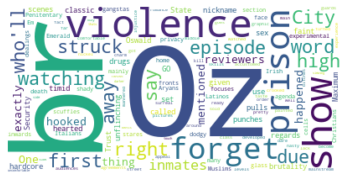

In [19]:
#creating a word cloud only for first review
text = df.review[0]
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("E:\Datasets\image.png")

In [18]:
#creating a word cloud for all reviews
text = " ".join(review for review in df.review)
print("total number of words when all the words are combined are",len(text))

total number of words when all the words are combined are 65521550


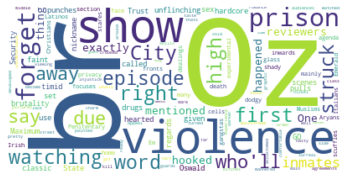

In [22]:
stopwords = set(STOPWORDS)
stopwords.update(["he","it","the"])
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [38]:
print(x_train.shape)
print(x_test.shape)

In [41]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [42]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [44]:
y_pred = text_model.predict(x_test)

In [49]:
y_pred[0:50]

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive'],
      dtype='<U8')

In [50]:
y_test[0:50]

array(['positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive'],
      dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy = accuracy_score(y_pred,y_test)*100

In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
cv_scores = cross_val_score(text_model,x_train,y_train,cv=10)
print(cv_scores)
print("the accuracy after cross validating is ",np.mean(cv_scores)*100)

[0.86771429 0.854      0.86285714 0.86342857 0.86514286 0.866
 0.85657143 0.85714286 0.86885714 0.86742857]
the accuracy after cross validating is  86.29142857142857


In [58]:
confusion_matrix(y_pred,y_test)

array([[6677, 1180],
       [ 863, 6280]])

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.89      0.85      0.87      7857
    positive       0.84      0.88      0.86      7143

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [61]:
# testing with a sample user review
test = "the movie was amazing and i would go for it again and again"
text_model.predict([test])

array(['positive'], dtype='<U8')

In [62]:
test1 = "worst, stupid, non sensitive, useless movie ever"
text_model.predict([test1])

array(['negative'], dtype='<U8')